# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

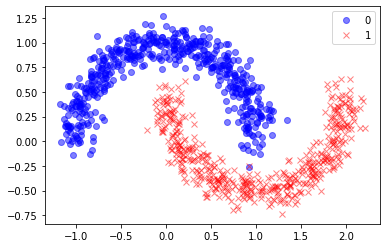

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training**

![graph](../../data/Opdracht5-1_graph.png)

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 667us/step - loss: 0.3184 - accuracy: 0.8467


In [10]:
results

[0.318368136882782, 0.846666693687439]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


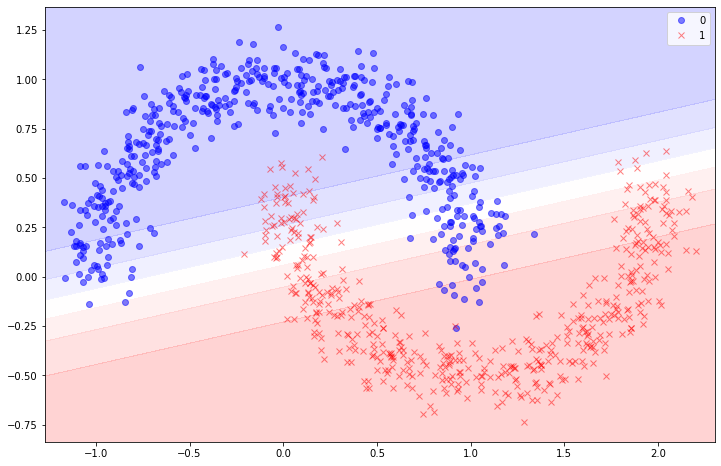

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

**Waarom werkt het shallow model hier niet?**
Het model heeft geen hidden layers en is daarom shallow. Dit gebrek aan layers zorgt ervoor dat de neuronen vereist om patronen te vinden niet aanwezig zijn.


### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?**

![graph](../../data/Odpracht5-2_graph.png)

**Welke optimizer wordt hier toegepast? Leg in eigen woorden uit wat i.h.a. de functie is van een optimizer.**
De optimizer die wordt toegepast is een Adam optimizer. Een optimizer veranderd de attributen van je model zoals weight and learning rate om zo minder data te verliezen.


In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 556us/step - loss: 0.0180 - accuracy: 0.9967


[0.018031081184744835, 0.996666669845581]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.996
The Accuracy score on the Test set is:	0.997


**Wat is je conclusie op basis van accuracy scores van de trainingset en de testset? M.a.w. hoe goed is classificatie?**
De beste accuracy score die je kan hebben is 1, heft model heeft een resultaat van 0.997 dus dat is heel goed.


**Is hier sprake van overfitting? Licht je antwoord toe**

de accuracy met 100 epochs:
![100 epochs](../../data/Opdracht5-2_100ep.png)

de accuracy met 10 epochs:
![10 epochs](../../data/Opdracht5-2_10ep.png)

De accuracy is met 10x minder epochs bijna exact hetzelfde. Wij zijn daarom van mening dat er spraken is van overfitting.


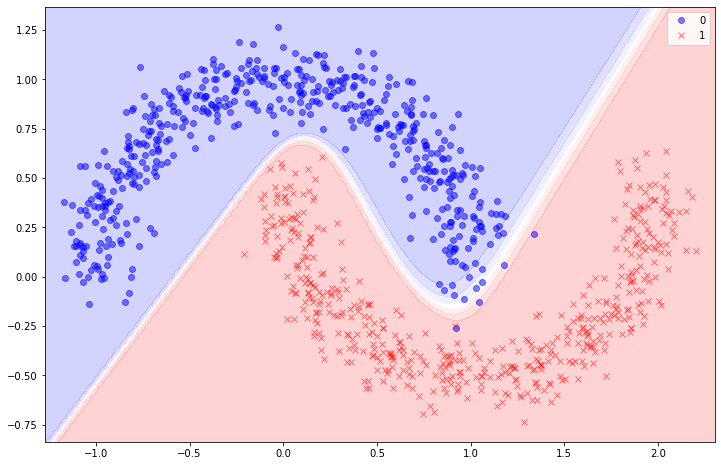

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('../../data/iris.csv')

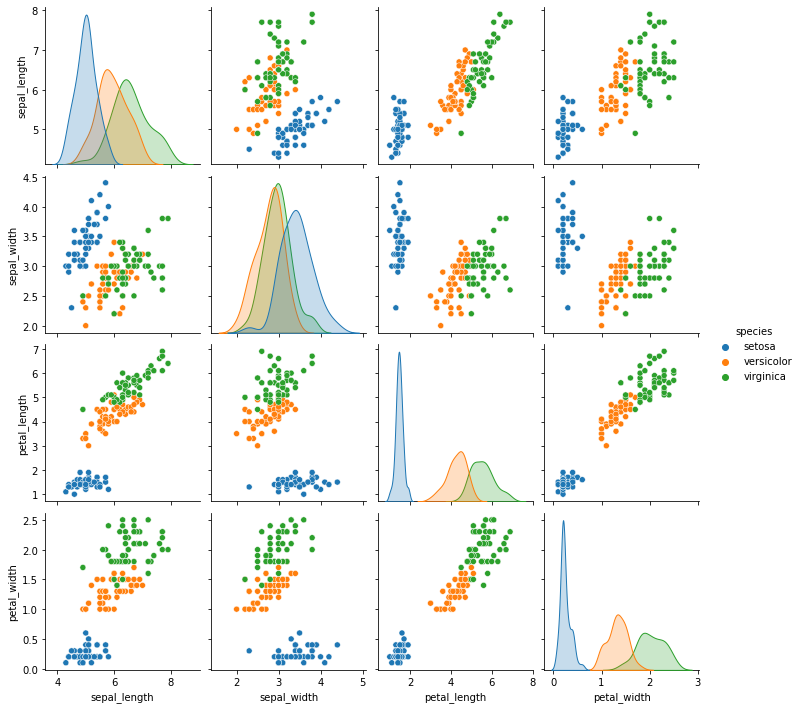

In [20]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_cat = to_categorical(y)

In [28]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [30]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.8),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?**

 ![IrisNNGraph.png](../../data/IrisNNGraph.png)

**In dit model wordt als activation function softmax gebruikt. Waarom wordt daarvoor hier gekozen?**
Softmax is een activation function die vaak wordt gebruikt als data klasse meer dan twee klasse labels heeft. Wat zo is want er zijn er namelijk 4: sepal_length, sepal_width, petal_length, petal_width.

**Onderzoek de invloed van de learning rate op het leerproces. Probeer verschillende waarden uit. Kijk ook welke informatie je hierover kunt vinden op het Internet. Wat is je conclusie?**

De learning rate is een percentage wat aangeeft hoeveel van de oude data wordt overschreven met nieuwe data. Als je een hoge learning rate hebt komt de machine dus veel nieuwe data tegen maar maakt daardoor dus ook meer fouten, maar is uiteindelijk wel beter getraind kwamen wij achter.

Model met 0.8 learning rate:
 ![LearningRateLow.png](../../data/learning_rate_high.png)
 
 Model met 0.1 learning rate:
 ![LearningRateLow.png](../../data/learning_rate_low.png)
 
 Conclusie: Een hogere learning rate begint met een hogere loss door alle nieuwe data maar uiteindelijk met minder loss omdat die minder fouten maakt doordat die meer data heeft gehad dan een model met een lagere learning rate. De model met een hogere learning rate heeft dan ook een hogere accuracy door de nieuwe d


In [31]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 0s 34ms/step - loss: 4.5997 - accuracy: 0.3148 - val_loss: 4.8334 - val_accuracy: 0.4167
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 5.0201 - accuracy: 0.5185 - val_loss: 7.2637 - val_accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 2.6010 - accuracy: 0.5741 - val_loss: 0.3339 - val_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.9530 - accuracy: 0.6944 - val_loss: 0.9215 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 1.0088 - accuracy: 0.6111 - val_loss: 0.4676 - val_accuracy: 0.5833
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.7870 - val_loss: 0.3896 - val_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 0.3622 - accuracy: 0.8056 - val_loss: 0.4034 - val_accuracy: 0.7500
Epoch 8/20
4/4 [=================

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]

array([[1.5420494e-10, 7.2456551e-01, 2.7543452e-01],
       [1.0000000e+00, 3.1340022e-08, 3.1737999e-16],
       [3.1559460e-11, 7.0922923e-01, 2.9077077e-01],
       [6.7309291e-09, 9.8216748e-01, 1.7832564e-02],
       [2.8369608e-16, 5.5957586e-01, 4.4042411e-01]], dtype=float32)

**Is hier sprake van overfitting? Licht je antwoord toe**

Model fitted met 20 epochs:
 ![20 epochs](../../data/Opdracht5-3_20ep.png)

Model fitted met 15 epochs:
 ![15 epochs](../../data/Opdracht5-3_15ep.png)

de accuracy van 15 epochs is gelijk aan die van 20, daar komt dus hetzelfde resultaat uit waardoor het model overfitted is met 20 epochs.

In [34]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.62      1.00      0.77        10
           2       1.00      0.57      0.73        14

    accuracy                           0.80        30
   macro avg       0.88      0.86      0.83        30
weighted avg       0.88      0.80      0.80        30



**Leg de betekenis van de waarden in het classification report uit, t.w. precision, recall en f1 score.**
Precision is het percentage van hoeveel voorspellingen correct zijn. Recall is het percentage waarmee met model alle positieve cases kan vinden. F1 score is het resultaat van de formule: F1 Score = 2*(Recall * Precision) / (Recall + Precision). F1 is het percentage van hoeveel positieve voorspelling correct waren.

**Welke conclusie trek je hier uit de scores in het classification report t.a.v. de betrouwbaarheid van de Iris classificatie?**
Het model is betrouwbaar omdat de scores hoog zijn.

In [37]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  6,  8]], dtype=int64)

**Welke informatie kun je uit de confusion matrix aflezen?**
De confusion matrix toont de plekken waar de het classification model eventueel niet goed/duidelijk werkt.

**Leg het belang uit van de informatie die je uit de confusion matrix haalt bij het trekken van conclusies**
Met een confusion matrix kan je de betrouwbaarheid van een model concluderen.